## Build a Wflow model from scratch

This notebook demonstrates how to prepare **Wflow** model from scratch using the command line interace (CLI).

All lines in this notebook which start with `!` are executed from the command line. Within the notebook environment the logging messages are shown after completion. You can also copy these lines and paste these in your shell to get more direct feedback.

### HydroMT CLI build interface

Lets first check if the Wflow model is recognized by HydroMT

# SELECT CORRECT Kernal

In [8]:
import hydromt
!hydromt --models

Model plugins:
	- model (hydromt 1.3.0rc5)
	- example_model (hydromt 1.3.0rc5)
	- wflow_sbm (hydromt_wflow 1.0.0.dev0)
	- wflow_sediment (hydromt_wflow 1.0.0.dev0)


In [2]:
!hydromt --models

Model plugins:
	- model (hydromt 1.3.0rc5)
	- example_model (hydromt 1.3.0rc5)
	- wflow_sbm (hydromt_wflow 1.0.0.dev0)
	- wflow_sediment (hydromt_wflow 1.0.0.dev0)


In [3]:
!hydromt build --help

Usage: hydromt build [OPTIONS] MODEL MODEL_ROOT

  Build models from scratch.

  Example usage: --------------

  To build a wflow model: hydromt build wflow_sbm /path/to/model_root -i
  /path/to/wflow_config.yml -d deltares_data -d /path/to/data_catalog.yml -v

  To build a sfincs model: hydromt build sfincs /path/to/model_root  -i
  /path/to/sfincs_config.yml -d /path/to/data_catalog.yml -v

Options:
  -i, --config PATH        Path to hydroMT configuration file, for the model
                           specific implementation.  [required]
  -d, --data TEXT          Path to local yaml data catalog file OR name of
                           predefined data catalog.
  --dd, --deltares-data    Flag: Shortcut to add the "deltares_data" catalog
  --fo, --force-overwrite  Flag: If provided overwrite existing model files
  --cache                  Flag: If provided cache tiled rasterdatasets
  -v, --verbose            Increase verbosity.
  -q, --quiet              Decrease verbosity.
  --hel

In [4]:
# !hydromt build wflow_sbm "./wflow_test_full"  -i wflow_build.yml -d artifact_data -vv

In [7]:
# this should return "wflow, wflow_sediment"
# as well as the generic HydroMT models "grid_model, lumped_model, network_model, (mesh_model)"
!hydromt --models

Model plugins:
	- model (hydromt 1.2.0.dev0)
	- example_model (hydromt 1.2.0.dev0)


Using the **HydroMT build** API we can setup a complete model from scratch. Let's get an overview of all the available options:

### Model setup configuration

The HydroMT configuration file (YAML) contains the model setup configuration and determines which methods are used to prepare the different components of a Wflow model and in which order and optionally sets non-default arguments for each method. This configuration is passed to HydroMT using `-i <path_to_config_file>`. We have prepared several example files which are available in the model repository [examples folder](https://github.com/Deltares/hydromt_wflow/tree/main/examples) and from the [docs (building a model)](https://deltares.github.io/hydromt_wflow/latest/user_guide/wflow_build). 

Each header (without indent) (e.g. `setup_basemaps:`) corresponds to a model method. All model methods are explained in the [docs (model components)](https://deltares.github.io/hydromt_wflow/latest/user_guide/wflow_model_setup.html). 

We will load the default wflow build configuration yaml file for inspection:

In [13]:
fn_config = "/data/shared/hydroMT_data/hydromt_dire_dawa/local_data.yml"

with open(fn_config, "r") as f:
    txt = f.read()
print(txt)

esa_worldcover_2021:
  crs: 4326
  data_type: RasterDataset
  driver: raster
  kwargs:
    chunks:
      x: 3600
      y: 3600
  meta:
    category: landuse
  path: esa_worldcover_2021.tif
Delta_DTM:
  crs: 4326
  data_type: RasterDataset
  driver: raster
  kwargs:
    chunks:
      x: 3600
      y: 3600
  meta:
    category: elevation
  path: delta_DTM.tif
soilgrids_2020:
  alias: soilgrids_v2.0
soilgrids_v2.0:
  data_type: RasterDataset
  driver: raster
  kwargs:
    chunks:
      x: 2400
      y: 2400
  meta:
    category: soil
    notes: "soilthickness is based on 1) soilgrids (global) and 2) dataset for Eurasia\
      \ (ESDAC, 2004; Panagos et al., 2012): ESDAC, 2004. The european soil database\
      \ distribution version 2.0, european commission and the European soil bureau\
      \ network.  esdac.jrc.ec.europa.eu, accessed: 2017-11-17.  Panagos, P., Van\
      \ Liedekerke, M., Jones, A., Montanarella, L., 2012. European soil data centre:\
      \ Response to european policy

### Data for model setup

The `<...>_fn` arguments correspond to a data source from the `DataCatalog` which is based on a yml-file with references to the data paths/urls and how the data should be read. This file can be provided to hydromt using `-d <path_to_yml_file>`. 

By default, the pre-defined `artifact_data` catalog containing some example data for the Piave basin will be downloaded to `~/.hydromt_data/` which is also used for this example. An overview of the available example data is provided [here](https://deltares.github.io/hydromt/latest/user_guide/data_existing_cat.html)
This example data is a based on the data which is available from the Deltares p-drive. 
If you have acces to this drive, a pre-configured catalog file can be loaded using the `-d deltares_data` pre-defined catalog. 

More background how to write a data catalog yml file can be found in the [HydroMT core docs](https://deltares.github.io/hydromt/latest/user_guide/data_prepare_cat.html) 

### Setup complete Wflow model 

Once we have prepared our data catalog and model build settings file, we are ready to ask HydroMT to build our Wflow model. Building the model can be done from the command line. Down below is an example for the Northern part of the Piave basin in Italy:

In [56]:
# NOTE: copy this line (without !) to your shell for more direct feedback
!hydromt build wflow_sbm "./first_wflow_modelv2" -i ./model_build_files/first_wflow_build.yml -d artifact_data --fo -v



2025-11-20 12:47:23,453 - hydromt - log - INFO - HydroMT version: 1.3.0-rc5
2025-11-20 12:47:23,888 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Reading data catalog artifact_data latest
2025-11-20 12:47:23,888 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /home/test2/.hydromt/artifact_data/v1.0.0/data_catalog.yml
2025-11-20 12:47:24,637 - hydromt.model.model - model - INFO - Initializing wflow_sbm model from hydromt_wflow (v1.0.0.dev0).
2025-11-20 12:47:24,637 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/parameters_data.yml
2025-11-20 12:47:24,652 - hydromt.hydromt_wflow.wflow_base - wflow_base - INFO - Supported Wflow.jl version v1+
2025-11-20 12:47:24,652 - hydromt.hydromt_wflow.components.config - config - INFO - Reading default config file from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/wflow_sbm/wflow_sbm.toml.
2025-11-20 12:47

With this example we build a complete Wflow model including forcing. The example means the following: run **hydromt build** with:

* `wflow` : i.e. build a Wflow model
* `./wflow_test_full` : output model folder
* `-r "{'subbasin': [12.2051, 45.8331], 'strord': 4, 'bounds': [11.70, 45.35, 12.95, 46.70]}"` : derive a subbasin with its outlet at the given x,y coordinates and within the given bounds [xmin, ymin, xmax, ymax] (WGS84) snapped to a river with minimum stream order (strord) of 4. All *REGION* options are described in the [docs](https://deltares.github.io/hydromt/latest/user_guide/model_region)
* `-i wflow_build.yml` : setup configuration file including all components to build and their arguments
* `-d artifact_data`: data catalog to use. Here `artifact_data` which contains a global data extract for Northern Italy for demo purposes.
* `-vv` : give some extra verbosity (2 * v) to display feedback on screen. Now debug messages are provided.


Next we check which files have been created. The model root should contain two netcdf (.nc) files, one for the staticmaps and one for the forcing data, a wflow run configuration (.toml) file. These files are sufficient to run the wflow model. In addition several geometry (.geojson) files are saved in the *staticgeoms* folder.  Finally, the setup process is logged in the hydromt.log file. 

In [12]:
import os

root = "first_wflow_model"
for path, _, files in os.walk(root):
    print(path)
    for name in files:
        if name.endswith(".xml"):
            continue
        print(f" - {name}")

first_wflow_model
 - staticmaps.nc
 - wflow_sbm.toml
 - inmaps-era5-2010.nc
 - hydromt.log
 - hydromt_data.yml
first_wflow_model/staticgeoms
 - glaciers.geojson
 - outlets.geojson
 - basins_highres.geojson
 - region.geojson
 - rivers.geojson
 - basins.geojson
 - gauges_grdc.geojson


### Visualize and/or inspect model schematization

In [ ]:
# Plot Forcing

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import hydromt
import hydromt_wflow

In [ ]:
hydromt_wflow.WflowSbmModel

In [19]:
model_directory = './first_wflow_model'

model = hydromt_wflow.WflowSbmModel(model_directory, mode="r")

2025-11-19 15:18:31,481 - hydromt.model.model - model - INFO - Initializing wflow_sbm model from hydromt_wflow (v1.0.0.dev0).
2025-11-19 15:18:31,482 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/parameters_data.yml
2025-11-19 15:18:31,500 - hydromt.hydromt_wflow.wflow_base - wflow_base - INFO - Supported Wflow.jl version v1+
2025-11-19 15:18:31,501 - hydromt.hydromt_wflow.components.config - config - INFO - Reading model config file from /home/test2/Capacity-Building-ICPAC-for-climate-services/2_IBF_Flood_Damage/first_wflow_model/wflow_sbm.toml.


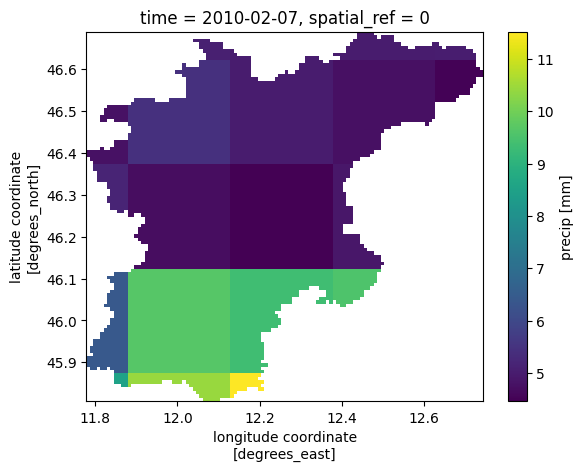

In [30]:
model.forcing.data.precip.isel(time=5).plot()

In [21]:
ds_forcing = model.forcing.data
ds_forcing = ds_forcing.mean(dim=[ds_forcing.raster.x_dim, ds_forcing.raster.y_dim])

In [23]:
# plot axes labels
_ATTRS = {
    "precip": {
        "standard_name": "precipitation",
        "unit": "mm.day-1",
        "color": "darkblue",
    },
    "pet": {
        "standard_name": "potential evapotranspiration",
        "unit": "mm.day-1",
        "color": "purple",
    },
    "temp": {"standard_name": "temperature", "unit": "degree C", "color": "orange"},
}

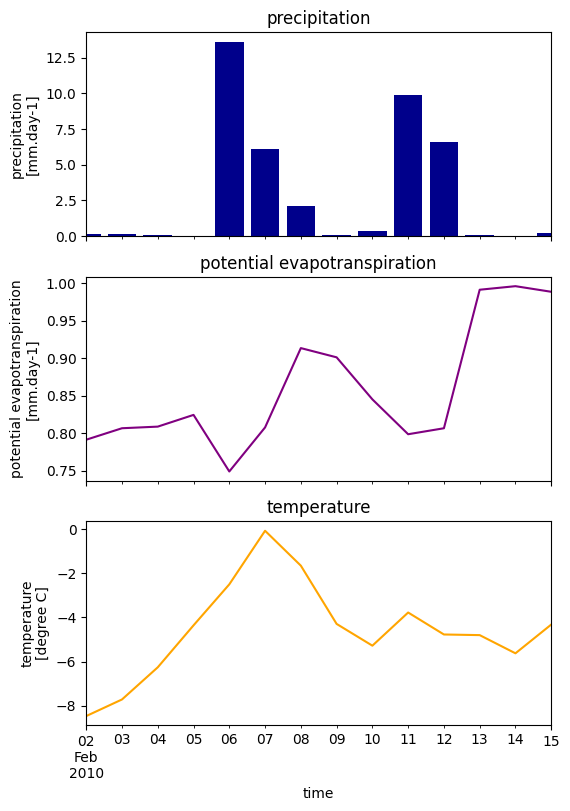

In [24]:
n = len(ds_forcing.data_vars)
kwargs0 = dict(sharex=True, figsize=(6, n * 3))

fig, axes = plt.subplots(n, 1, **kwargs0)
axes = [axes] if n == 1 else axes
for i, name in enumerate(ds_forcing.data_vars):
    df = ds_forcing[name].squeeze().to_series()
    attrs = _ATTRS[name]
    longname = attrs.get("standard_name", "")
    unit = attrs.get("unit", "")
    if name == "precip":
        axes[i].bar(df.index, df.values, facecolor=attrs["color"])
    else:
        df.plot.line(ax=axes[i], x="time", color=attrs["color"])
    axes[i].set_title(longname)
    axes[i].set_ylabel(f"{longname}\n[{unit}]")

# save figure
# fn_out = join(mod.root, "figs", "forcing.png")
# plt.savefig(fn_out, dpi=225, bbox_inches="tight")

In [31]:


import xarray as xr
import numpy as np
import hydromt
from hydromt_wflow import WflowSbmModel



In [32]:


# Plotting dependencies
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt



In [36]:
model.staticmaps.data

<xarray.Dataset> Size: 3MB
Dimensions:                               (latitude: 106, longitude: 116,
                                           time: 12, layer: 4)
Coordinates:
  * latitude                              (latitude) float64 848B 46.69 ... 4...
  * longitude                             (longitude) float64 928B 11.78 ... ...
  * time                                  (time) int32 48B 1 2 3 4 ... 10 11 12
  * layer                                 (layer) int64 32B 0 1 2 3
    spatial_ref                           int64 8B 0
Data variables: (12/52)
    meta_subgrid_outlet_x                 (latitude, longitude) float64 98kB ...
    meta_subgrid_outlet_y                 (latitude, longitude) float64 98kB ...
    local_drain_direction                 (latitude, longitude) uint8 12kB 25...
    subcatchment                          (latitude, longitude) int32 49kB 0 ...
    meta_upstream_area                    (latitude, longitude) float32 49kB ...
    meta_subgrid_area                     (latitude, longitude) float32 49kB ...
    ...                                    ...
    meta_soilgrids_ksat_vertical_200.0cm  (latitude, longitude) float32 49kB ...
    soil_f_                               (latitude, longitude) float32 49kB ...
    soil_f                                (latitude, longitude) float32 49kB ...
    meta_soil_texture                     (latitude, longitude) int32 49kB -9...
    outlets                               (latitude, longitude) int32 49kB 0 ...
    gauges_grdc                           (latitude, longitude) int32 49kB 0 ...

# toevoegen try other layers!!!

In [41]:


# read and mask the model elevation
da = model.staticmaps.data["land_elevation"].raster.mask_nodata()
da.attrs.update(long_name="elevation", units="m")
# read/derive river geometries
gdf_riv = model.rivers
# read/derive model basin boundary
gdf_bas = model.basins



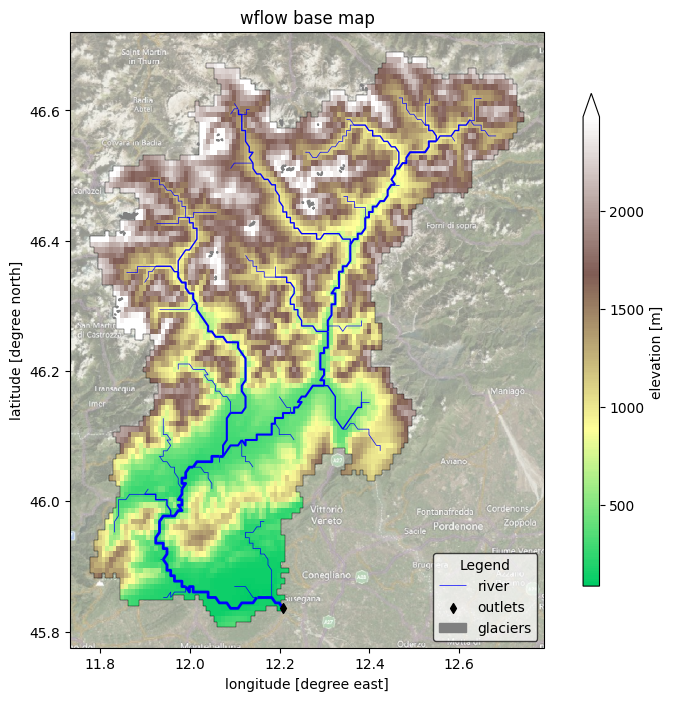

In [42]:
# we assume the model maps are in the geographic CRS EPSG:4326
proj = ccrs.PlateCarree()
# adjust zoomlevel and figure size to your basis size & aspect
zoom_level = 10
figsize = (10, 8)
shaded = False  # shaded elevation (looks nicer with more pixels (e.g.: larger basins))!

# initialize image with geoaxes
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(projection=proj)
bbox = da.raster.box.to_crs(3857).buffer(5e3).to_crs(da.raster.crs).total_bounds
extent = np.array(bbox)[[0, 2, 1, 3]]
ax.set_extent(extent, crs=proj)

# add sat background image
ax.add_image(cimgt.QuadtreeTiles(), zoom_level, alpha=0.5)

## plot elevation\
# create nice colormap
vmin, vmax = da.quantile([0.0, 0.98]).compute()
c_dem = plt.cm.terrain(np.linspace(0.25, 1, 256))
cmap = colors.LinearSegmentedColormap.from_list("dem", c_dem)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
kwargs = dict(cmap=cmap, norm=norm)
# plot 'normal' elevation
da.plot(
    transform=proj, ax=ax, zorder=1, cbar_kwargs=dict(aspect=30, shrink=0.8), **kwargs
)
# plot elevation with shades
if shaded:
    ls = colors.LightSource(azdeg=315, altdeg=45)
    dx, dy = da.raster.res
    _rgb = ls.shade(
        da.fillna(0).values,
        norm=kwargs["norm"],
        cmap=kwargs["cmap"],
        blend_mode="soft",
        dx=dx,
        dy=dy,
        vert_exag=200,
    )
    rgb = xr.DataArray(dims=("y", "x", "rgb"), data=_rgb, coords=da.raster.coords)
    rgb = xr.where(np.isnan(da), np.nan, rgb)
    rgb.plot.imshow(transform=proj, ax=ax, zorder=2)

# plot rivers with increasing width with stream order
gdf_riv.plot(
    ax=ax, linewidth=gdf_riv["strord"] / 2, color="blue", zorder=3, label="river"
)
# plot the basin boundary
gdf_bas.boundary.plot(ax=ax, color="k", linewidth=0.3)
# plot various vector layers if present
if "outlets" in model.geoms.data:
    model.geoms.data["outlets"].plot(
        ax=ax, marker="d", markersize=25, facecolor="k", zorder=5, label="outlets"
    )
patches = []  # manual patches for legend, see https://github.com/geopandas/geopandas/issues/660
if "meta_reservoirs_no_control" in model.geoms.data:
    kwargs = dict(facecolor="lightblue", edgecolor="black", linewidth=1, label="reservoirs (natural lakes)")
    model.geoms.data["meta_reservoirs_no_control"].plot(ax=ax, zorder=4, **kwargs)
    patches.append(mpatches.Patch(**kwargs))
if "meta_reservoirs_simple_control" in model.geoms.data:
    kwargs = dict(facecolor="blue", edgecolor="black", linewidth=1, label="reservoirs (simple control)")
    model.geoms.data["meta_reservoirs_simple_control"].plot(ax=ax, zorder=4, **kwargs)
    patches.append(mpatches.Patch(**kwargs))
if "glaciers" in model.geoms.data:
    kwargs = dict(facecolor="grey", edgecolor="grey", linewidth=1, label="glaciers")
    model.geoms.data["glaciers"].plot(ax=ax, zorder=4, **kwargs)
    patches.append(mpatches.Patch(**kwargs))

ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.set_ylabel(f"latitude [degree north]")
ax.set_xlabel(f"longitude [degree east]")
_ = ax.set_title(f"wflow base map")
legend = ax.legend(
    handles=[*ax.get_legend_handles_labels()[0], *patches],
    title="Legend",
    loc="lower right",
    frameon=True,
    framealpha=0.7,
    edgecolor="k",
    facecolor="white",
)

# save figure
# NOTE create figs folder in model root if it does not exist
# fn_out = join(mod.root, "figs", "basemap.png")
# plt.savefig(fn_out, dpi=225, bbox_inches="tight")



In [88]:
!julia -e 'using Pkg; Pkg.add(url="https://github.com/Deltares/Wflow.jl", subdir="Wflow")'

    Updating git-repo `https://github.com/Deltares/Wflow.jl`
   Resolving package versions...
   Installed CompositionsBase ─ v0.1.2
   Installed EnumX ──────────── v1.0.5]  1/7
   Installed PropertyDicts ──── v0.2.1]  2/7
   Installed InverseFunctions ─ v0.1.17  3/7
   Installed FillArrays ─────── v1.15.0  4/7
   Installed Accessors ──────── v0.1.42  5/7
   Installed CFTime ─────────── v0.2.4]  6/7
    Updating `~/.julia/environments/v1.11/Project.toml`
  [d48b7d99] + Wflow v1.0.0-rc3 `https://github.com/Deltares/Wflow.jl:Wflow#master`
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [1520ce14] + AbstractTrees v0.4.5
  [7d9f7c33] + Accessors v0.1.42
  [79e6a3ab] + Adapt v4.4.0
  [ec485272] + ArnoldiMethod v0.4.0
  [4fba245c] + ArrayInterface v7.22.0
  [59605e27] + BasicModelInterface v0.1.1
  [62783981] + BitTwiddlingConvenienceFunctions v0.1.6
  [179af706] + CFTime v0.2.4
  [2a0fbf3d] + CPUSummary v0.2.7
  [fb6a15b2] + CloseOpenIntervals v0.1.13
  [1fbeeb36] + CommonDataMod

In [89]:
!julia -e 'using Wflow; Wflow.run("first_wflow_modelv2/wflow_sbm.toml")'

[ Info: Wflow version v1.0.0-rc3
[ Info: Initialize model variables for model type sbm.
[ Info: Cyclic parameters are provided by first_wflow_modelv2/staticmaps.nc.
┌ Info: Forcing parameters are provided by
└ first_wflow_modelv2/inmaps-era5-2010.nc.
┌ Info: Set atmosphere_water__precipitation_volume_flux using netCDF variable
└ precip as forcing parameter.
┌ Info: Set atmosphere_air__temperature using netCDF variable temp as forcing
└ parameter.
┌ Info: Set land_surface_water__potential_evaporation_volume_flux using
└ netCDF variable pet as forcing parameter.
┌ Info: Set vegetation__leaf_area_index using netCDF variable
└ vegetation_leaf_area_index as cyclic parameter, with 12 timesteps.
┌ Info: General model settings
│   snow = true
│   gravitational_snow_transport = true
│   glacier = true
│   reservoirs = false
│   pits = false
└   water_demand = false
[ Info: Set subbasin_location__count using netCDF variable subcatchment.
┌ Info: Set basin__local_drain_direction using netCDF vari

In [90]:
import matplotlib.pyplot as plt
import hydromt
from hydromt_wflow import WflowSbmModel

In [95]:


# Dictionary listing the different wflow models and runs to compare, including plotting options
run=  { "longname": "default",
        "color": "blue",
        "root": "./first_wflow_modelv2",
        "config_fn": "wflow_sbm.toml",
}


In [96]:

model = WflowSbmModel(root=run["root"], mode="r+", config_filename=run["config_fn"])
run.update({"model": model})


2025-11-20 13:41:46,180 - hydromt.model.model - model - INFO - Initializing wflow_sbm model from hydromt_wflow (v1.0.0.dev0).
2025-11-20 13:41:46,181 - hydromt.data_catalog.data_catalog - data_catalog - INFO - Parsing data catalog from /opt/icpac-course/hydromt_wflow/hydromt_wflow/data/parameters_data.yml
2025-11-20 13:41:46,199 - hydromt.hydromt_wflow.wflow_base - wflow_base - INFO - Supported Wflow.jl version v1+
2025-11-20 13:41:46,199 - hydromt.hydromt_wflow.components.config - config - INFO - Reading model config file from /home/test2/Capacity-Building-ICPAC-for-climate-services/2_IBF_Flood_Damage/first_wflow_modelv2/wflow_sbm.toml.


In [97]:
model1 = run["model"]
model1.output_grid.data

2025-11-20 13:42:18,331 - hydromt.hydromt_wflow.components.output_grid - output_grid - INFO - Read netcdf_grid output from /home/test2/Capacity-Building-ICPAC-for-climate-services/2_IBF_Flood_Damage/first_wflow_modelv2/run_default/output.nc


<xarray.Dataset> Size: 641kB
Dimensions:      (longitude: 116, latitude: 106, layer: 4, time: 13)
Coordinates:
  * longitude    (longitude) float64 928B 11.78 11.79 11.8 ... 12.72 12.73 12.74
  * latitude     (latitude) float64 848B 46.69 46.68 46.67 ... 45.83 45.82 45.81
  * layer        (layer) float64 32B 1.0 2.0 3.0 4.0
  * time         (time) datetime64[ns] 104B 2010-02-03 2010-02-04 ... 2010-02-15
    spatial_ref  int64 8B 0
Data variables:
    q_av         (time, latitude, longitude) float32 639kB dask.array<chunksize=(13, 106, 116), meta=np.ndarray>

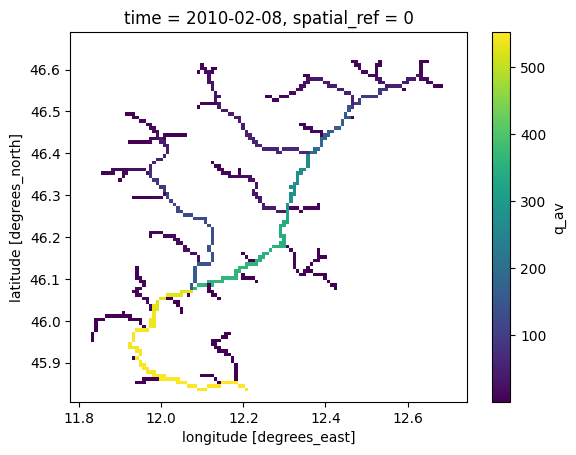

In [108]:
model1.output_grid.data.q_av.isel(time=5).plot()

In [99]:


model1.output_csv.data
model1.output_csv



{'river_q_outlets': <xarray.DataArray 'river_q_outlets' (index: 1, time: 13)> Size: 104B
 array([[  1.24049574, 358.35185627, 560.78011527, 605.87152075,
         592.73027644, 552.48829504, 506.55812168, 470.68786768,
         445.92449077, 420.57610562, 392.54550626, 367.44499746,
         346.43685148]])
 Coordinates:
   * index        (index) int32 4B 1
   * time         (time) datetime64[ns] 104B 2010-02-03 2010-02-04 ... 2010-02-15
     geometry     (index) object 8B POINT (12.207500000000012 45.83583333333334)
     value        (index) float64 8B 1.0
     spatial_ref  int64 8B 0,
 'river_q_gauges_grdc': <xarray.DataArray 'river_q_gauges_grdc' (index: 3, time: 13)> Size: 312B
 array([[ 10.62863469,  19.51598547,  20.03707206,  18.57169699,
          16.90527323,  15.36503083,  14.00331467,  12.82249601,
          11.7955429 ,  10.89183131,  10.09714681,   9.42626598,
           8.84062182],
        [ 41.360757  ,  95.47328181, 108.34186124, 104.05864839,
          97.94382131,  9

In [104]:
timeseries_fn

'gauges_observed_flow.csv'

In [101]:


# Discharge data
timeseries_fn = "gauges_observed_flow.csv"  # observed discharge timeseries
name = "gauges_grdc"  # gauges locations in staticgeoms
stationID = "grdc_no"  # column name in staticgeoms containing the stations IDs

# Read the observations data
# read timeseries data and match with existing gdf
gdf = run["model"].geoms.get(name)
gdf.index = gdf[stationID]


da_ts = hydromt.readers.open_timeseries_from_table(timeseries_fn, name=name, sep=";")
da = hydromt.vector.GeoDataArray.from_gdf(gdf, da_ts, index_dim="index")

obs = da
obs



FileNotFoundError: [Errno 2] No such file or directory: 'gauges_observed_flow.csv'

* The **wflow plot** example notebook contains scripts to visualize your model
* The **wflow nc to raster files** example notebook contains scripts to write the nc model files to a netcdf which can be used to inspect (and modify) the model layers in e.g. QGIS.